In [7]:
import argparse
import configparser
import pandas as pd
import boto3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pymc3 as pm
import theano.tensor as tt
import arviz as az
from scipy import stats as sts
import warnings
from Data import Data
from Model import BaseLineModel, SwitchPointBasicModel, SwitchPointModel, SwitchPointDiscreteModel
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
parser = argparse.ArgumentParser()
parser.add_argument('--dummy', nargs='?', default='None')
parser.add_argument('--s3-bucket', nargs='?', default='mtr-hk-dev-processed-data-bucket', type=str)
parser.add_argument('--s3-prefix', nargs='?', default='OEDS/SPIRT/dev/', type=str)
parser.add_argument('--last-n-days', nargs='?', default='30', type=int)
parser.add_argument('--use-cols', nargs='*', default='30', type=int)

parser.add_argument('--num-samples', nargs='*', default=1000, type=int)
parser.add_argument('--num-burnin', nargs='*', default=5000, type=int)

parser.add_argument("-c", "--config", dest='config_file', default='config.ini', type=str);

args = parser.parse_args(args=['--dummy'])
#config = configparser.ConfigParser()
#config.read(args.config_file)
#use_cols = config.get('main', 'use_cols').split(',')

In [5]:
data = Data(args.s3_bucket, args.s3_prefix, args.last_n_days)
data.get_raw_generator()
data.preprocessing()

# Experiment

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, sigma_2, sigma_1, sigma_sensor, beta_2, beta_1, mu_2, mu_1, switch]


Sampling 4 chains for 5_000 tune and 1_000 draw iterations (20_000 + 4_000 draws total) took 36 seconds.
There were 58 divergences after tuning. Increase `target_accept` or reparameterize.
There were 47 divergences after tuning. Increase `target_accept` or reparameterize.
There were 158 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6073966172198819, but should be close to 0.8. Try to increase the number of tuning steps.
There were 112 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6379879683930778, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


C:\Users\benyp\anaconda3\envs\pm\lib\site-packages\arviz\stats\stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


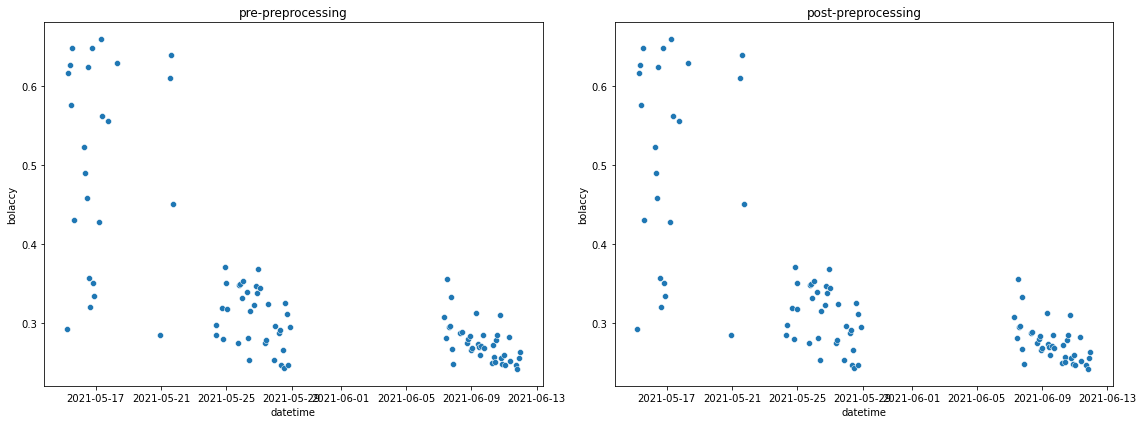

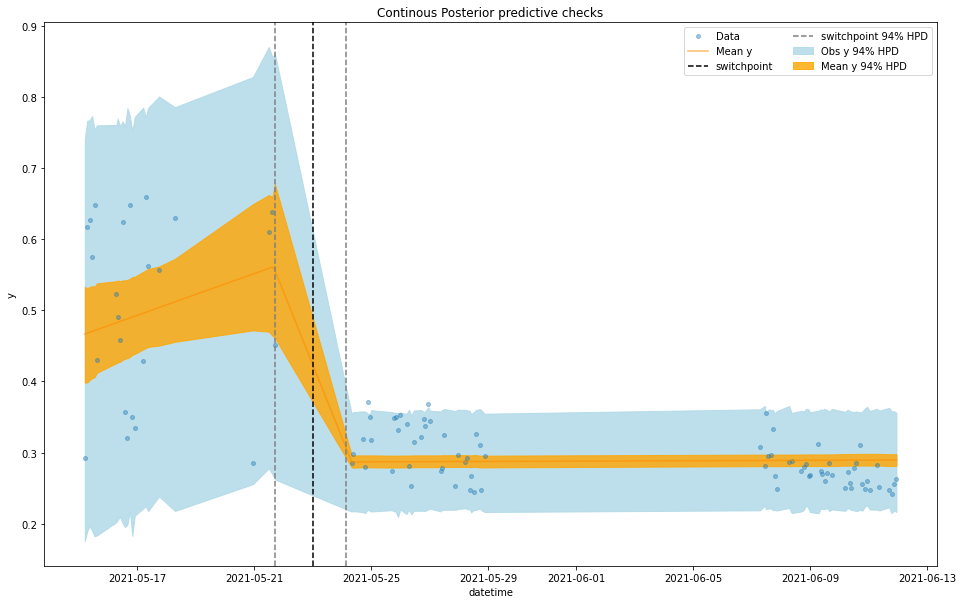

In [215]:
suspect = (9.65, 'Down')
target = 'bolaccy'
df = data.sub_df(*suspect, target)

model = SwitchPointModel.from_df(df=df, target=target, num_samples=args.num_samples, num_burnin=args.num_burnin)
model.define_model() 
model.fit()
model.plot_posterior_predictive()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, sigma_2, sigma_1, mu_2, mu_1, switch]


Sampling 4 chains for 5_000 tune and 1_000 draw iterations (20_000 + 4_000 draws total) took 27 seconds.
There were 97 divergences after tuning. Increase `target_accept` or reparameterize.
There were 92 divergences after tuning. Increase `target_accept` or reparameterize.
There were 90 divergences after tuning. Increase `target_accept` or reparameterize.
There were 94 divergences after tuning. Increase `target_accept` or reparameterize.


C:\Users\benyp\anaconda3\envs\pm\lib\site-packages\arviz\stats\stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


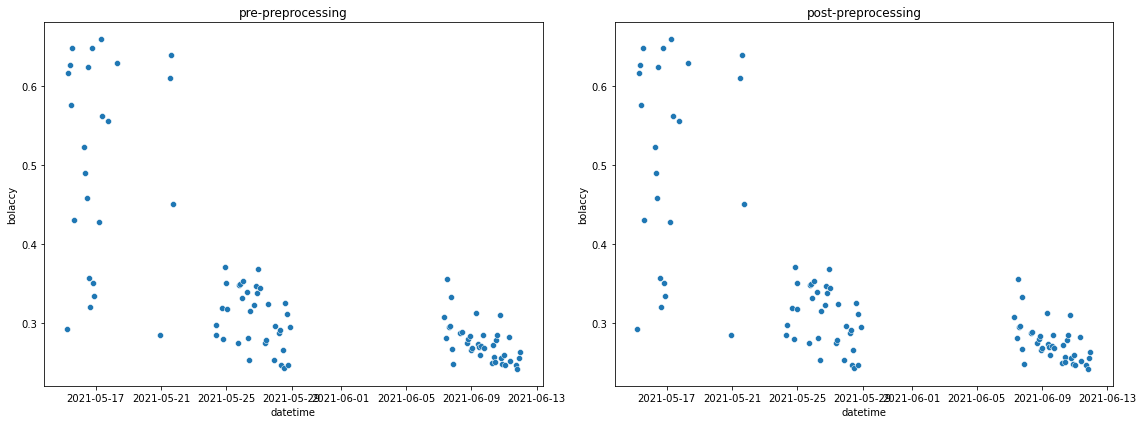

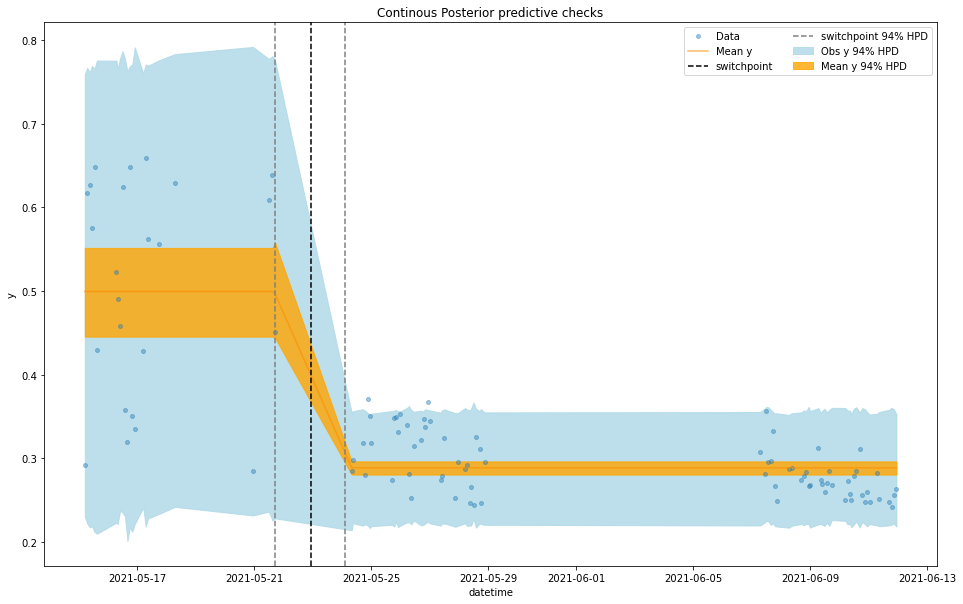

In [216]:
suspect = (9.65, 'Down')
target = 'bolaccy'
df = data.sub_df(*suspect, target)

model = SwitchPointBasicModel.from_df(df=df, target=target, num_samples=args.num_samples, num_burnin=args.num_burnin)
model.define_model() 
model.fit()
model.plot_posterior_predictive()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, sigma_2, sigma_1, sigma_sensor, beta_2, beta_1, mu_2, mu_1, switch]


Sampling 4 chains for 5_000 tune and 1_000 draw iterations (20_000 + 4_000 draws total) took 37 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.61062948093961, but should be close to 0.8. Try to increase the number of tuning steps.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6701387029904513, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


C:\Users\benyp\anaconda3\envs\pm\lib\site-packages\arviz\stats\stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


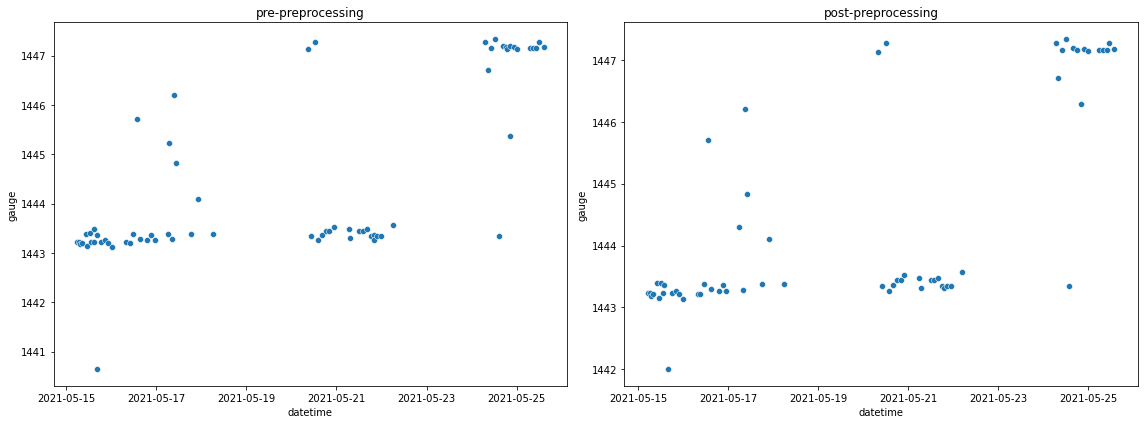

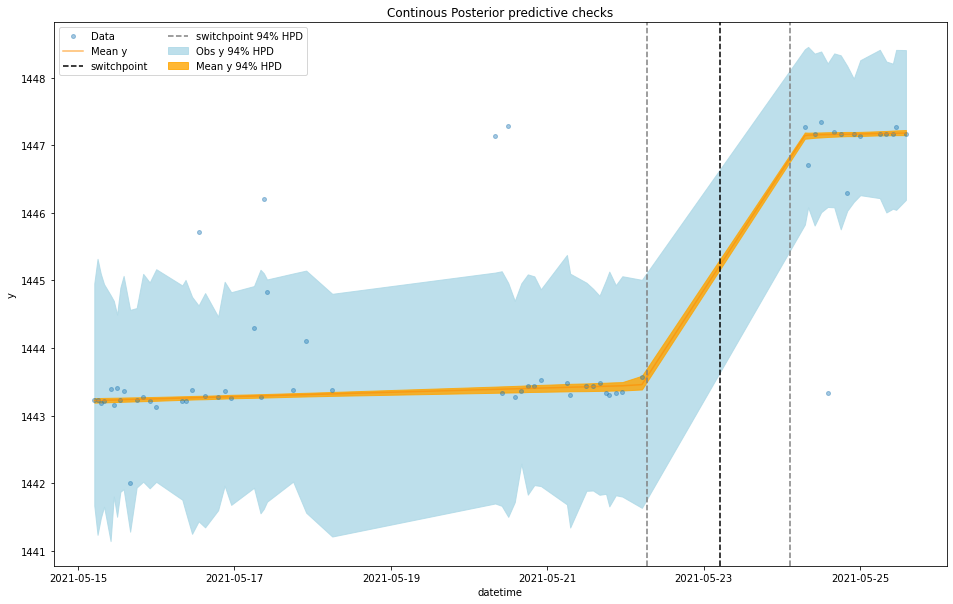

In [207]:
suspect = (26.25, 'Up')
target = 'gauge'
df = data.sub_df(*suspect, target)

model = SwitchPointModel.from_df(df=df, target=target, num_samples=args.num_samples, num_burnin=args.num_burnin)
model.define_model() 
model.fit()
model.plot_posterior_predictive()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, sigma_2, sigma_1, mu_2, mu_1, switch]


Sampling 4 chains for 5_000 tune and 1_000 draw iterations (20_000 + 4_000 draws total) took 29 seconds.
There were 110 divergences after tuning. Increase `target_accept` or reparameterize.
There were 96 divergences after tuning. Increase `target_accept` or reparameterize.
There were 91 divergences after tuning. Increase `target_accept` or reparameterize.
There were 79 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


C:\Users\benyp\anaconda3\envs\pm\lib\site-packages\arviz\stats\stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


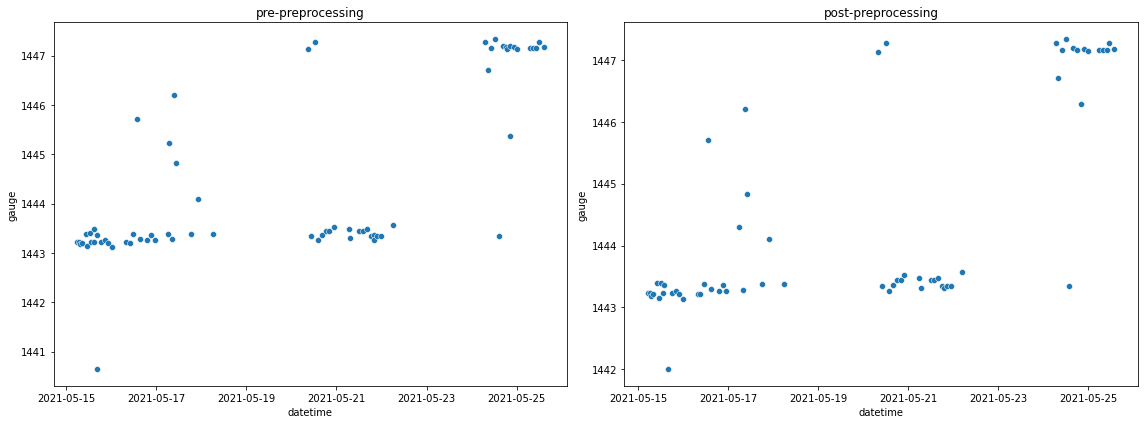

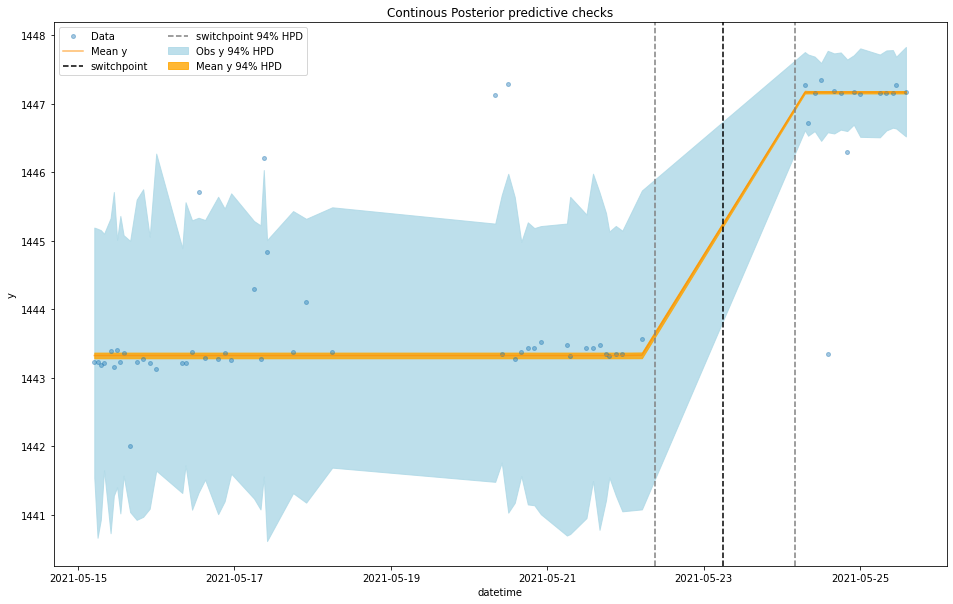

In [208]:
model = SwitchPointBasicModel.from_df(df=df, target=target, num_samples=args.num_samples, num_burnin=args.num_burnin)
model.define_model() 
model.fit()
model.plot_posterior_predictive()

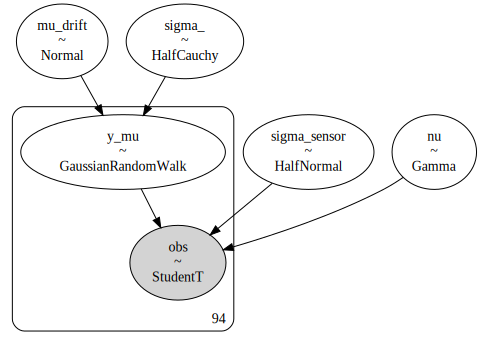

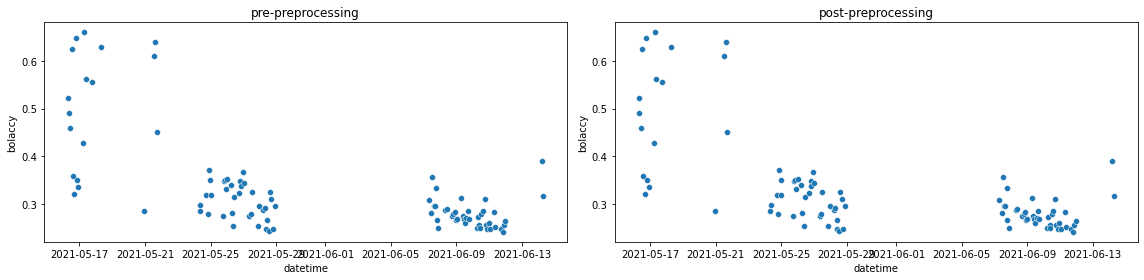

In [9]:
suspect = (9.65, 'Down')
target = 'bolaccy'
df = data.sub_df(*suspect, target)

gp_model = GaussianProcessModel.from_df(df=df, target=target, num_samples=10000, num_burnin=10000)
gp_model.define_model() 
pm.model_to_graphviz(gp_model.model)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, y_mu, mu_drift, sigma_, sigma_sensor]


Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 66 seconds.
There were 128 divergences after tuning. Increase `target_accept` or reparameterize.
There were 62 divergences after tuning. Increase `target_accept` or reparameterize.
There were 20 divergences after tuning. Increase `target_accept` or reparameterize.
There were 401 divergences after tuning. Increase `target_accept` or reparameterize.
The estimated number of effective samples is smaller than 200 for some parameters.


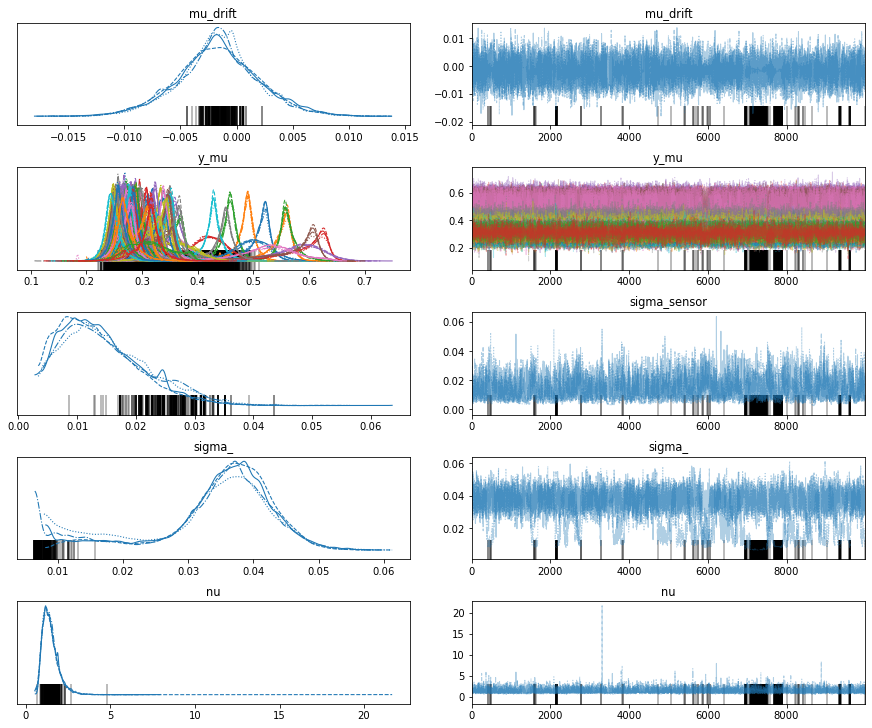

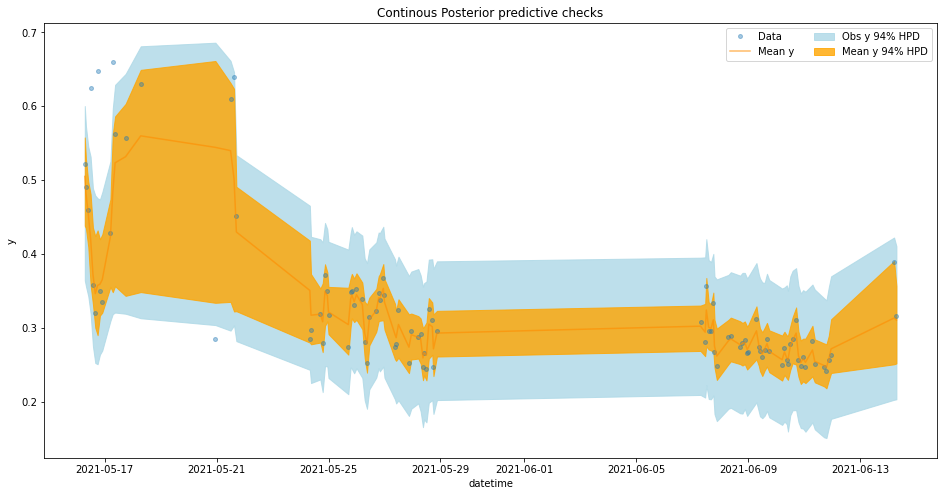

In [10]:
gp_model.fit()
gp_model.plot_trace()
gp_model.plot_posterior_predictive()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, sigma_2, sigma_1, mu_2, mu_1, switch]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 22 seconds.
The number of effective samples is smaller than 10% for some parameters.


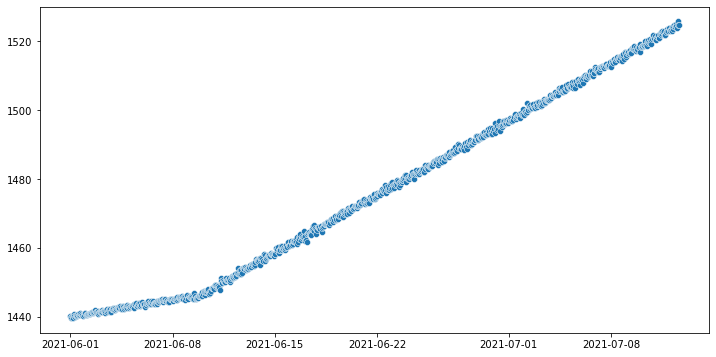

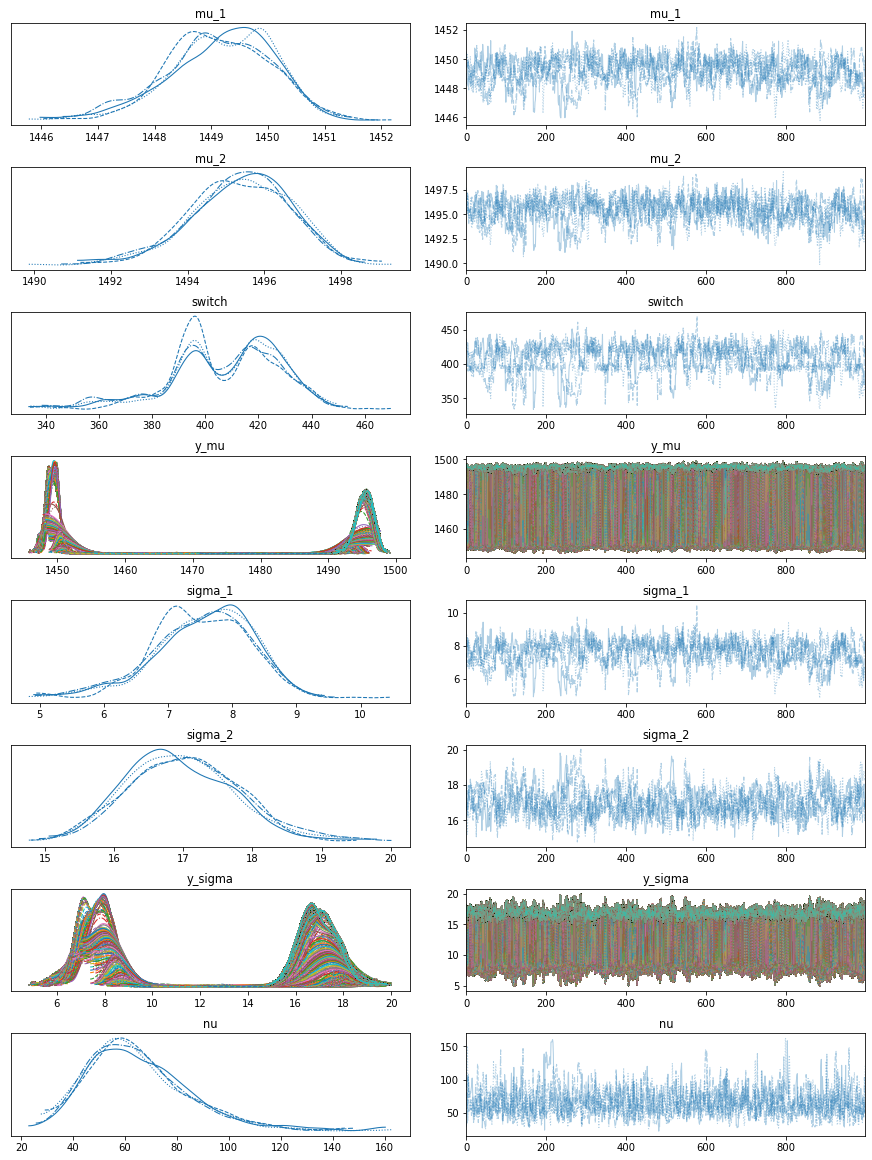

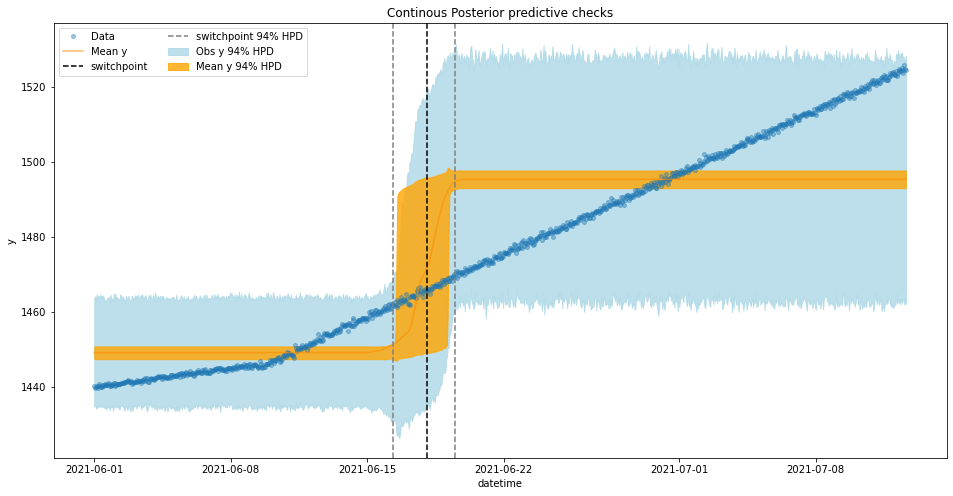

In [64]:
sample_data = SwitchPointBasicModel.sample_data(N=1000, sp_loc=0.2, mu_1=1440, mu_2=1445, beta_1=0.03, beta_2=0.1, sigma_1=0.3, sigma_2=0.6)
model = SwitchPointBasicModel(*sample_data)
model.define_model() 
model.fit()
model.plot_trace()
model.plot_posterior_predictive()

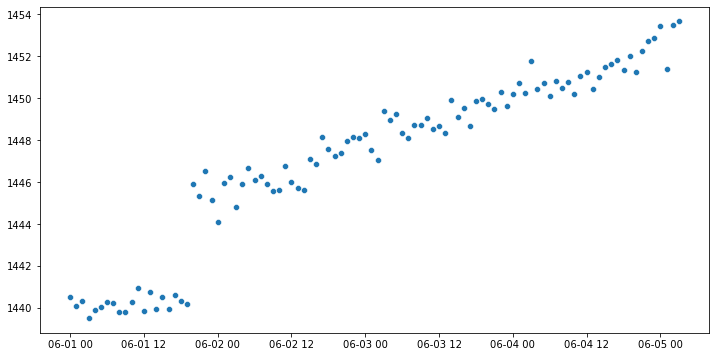

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, sigma_2, sigma_1, sigma_sensor, beta_2, beta_1, mu_2, mu_1, switch]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 30 seconds.
There were 26 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
There were 60 divergences after tuning. Increase `target_accept` or reparameterize.
There were 27 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7098356263418922, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


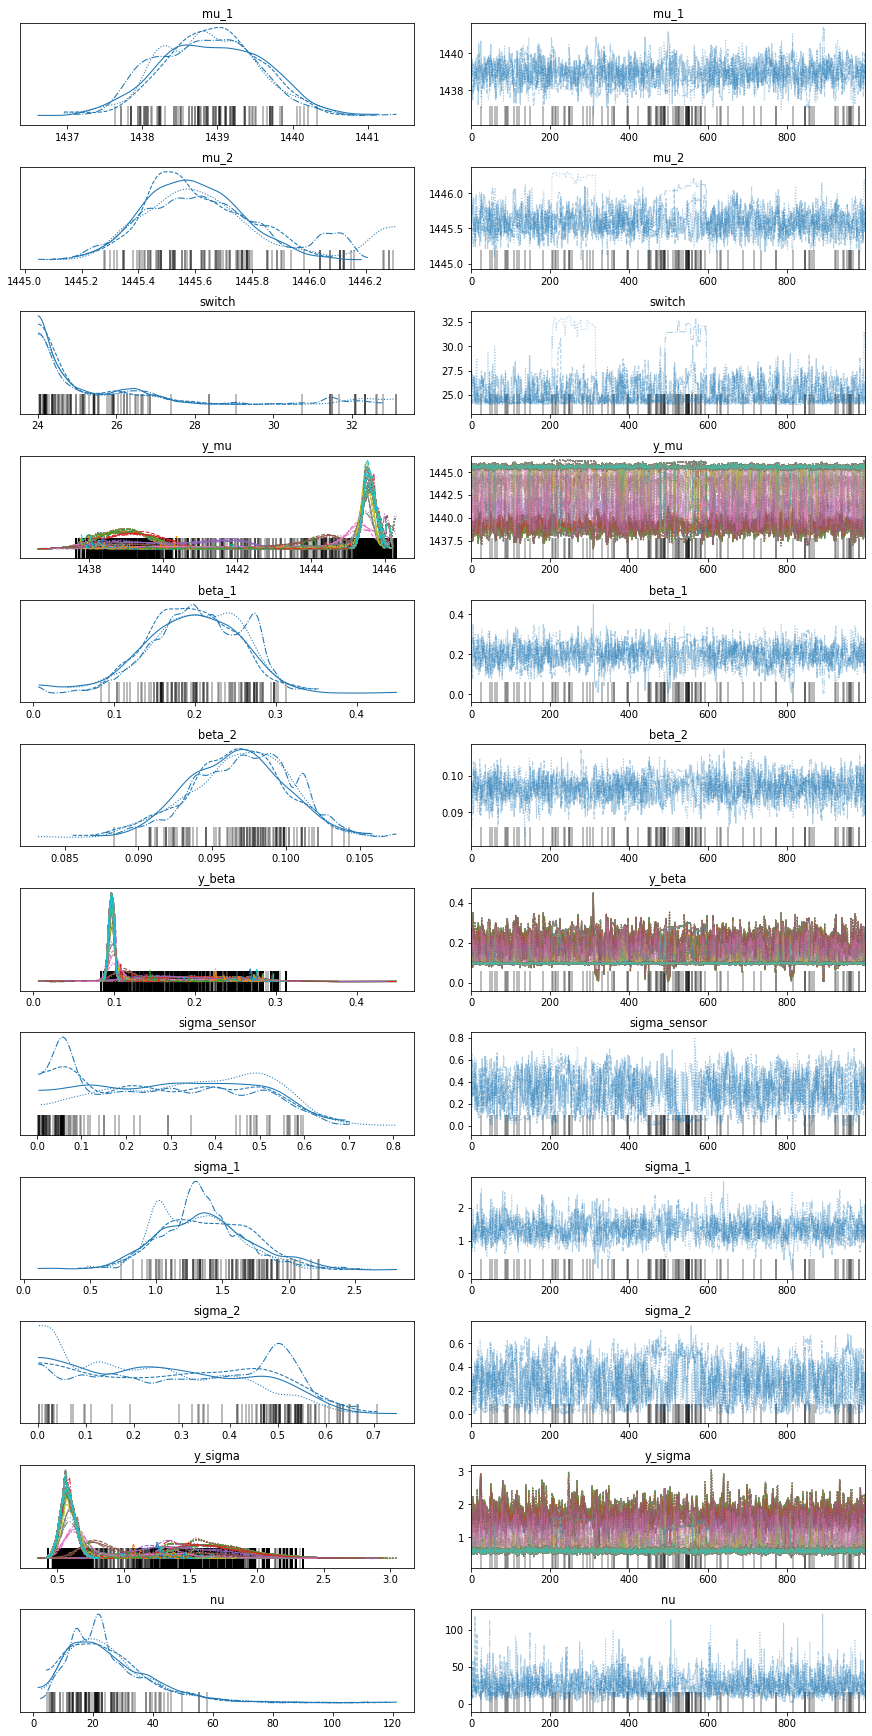

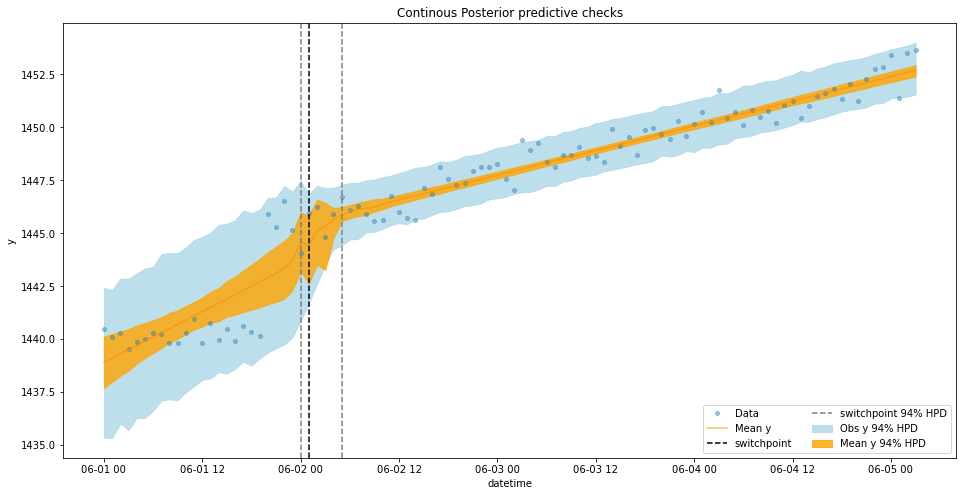

In [86]:
sample_data = SwitchPointModel.sample_data(N=100, sp_loc=0.2, mu_1=1440, mu_2=1445, beta_1=0.03, beta_2=0.1, sigma_1=0.3, sigma_2=0.6)
model = SwitchPointModel(*sample_data)
model.define_model() 
model.fit()
model.plot_trace()
model.plot_posterior_predictive()

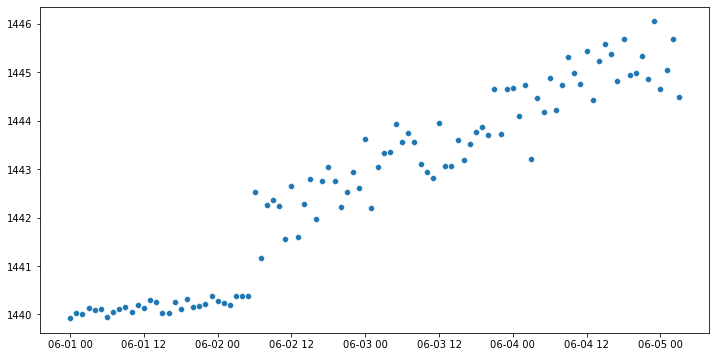

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [switch]
>NUTS: [nu, sigma_2, sigma_1, sigma_sensor, beta_2, beta_1, mu_2, mu_1]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 31 seconds.
There were 52 divergences after tuning. Increase `target_accept` or reparameterize.
There were 18 divergences after tuning. Increase `target_accept` or reparameterize.
There were 117 divergences after tuning. Increase `target_accept` or reparameterize.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


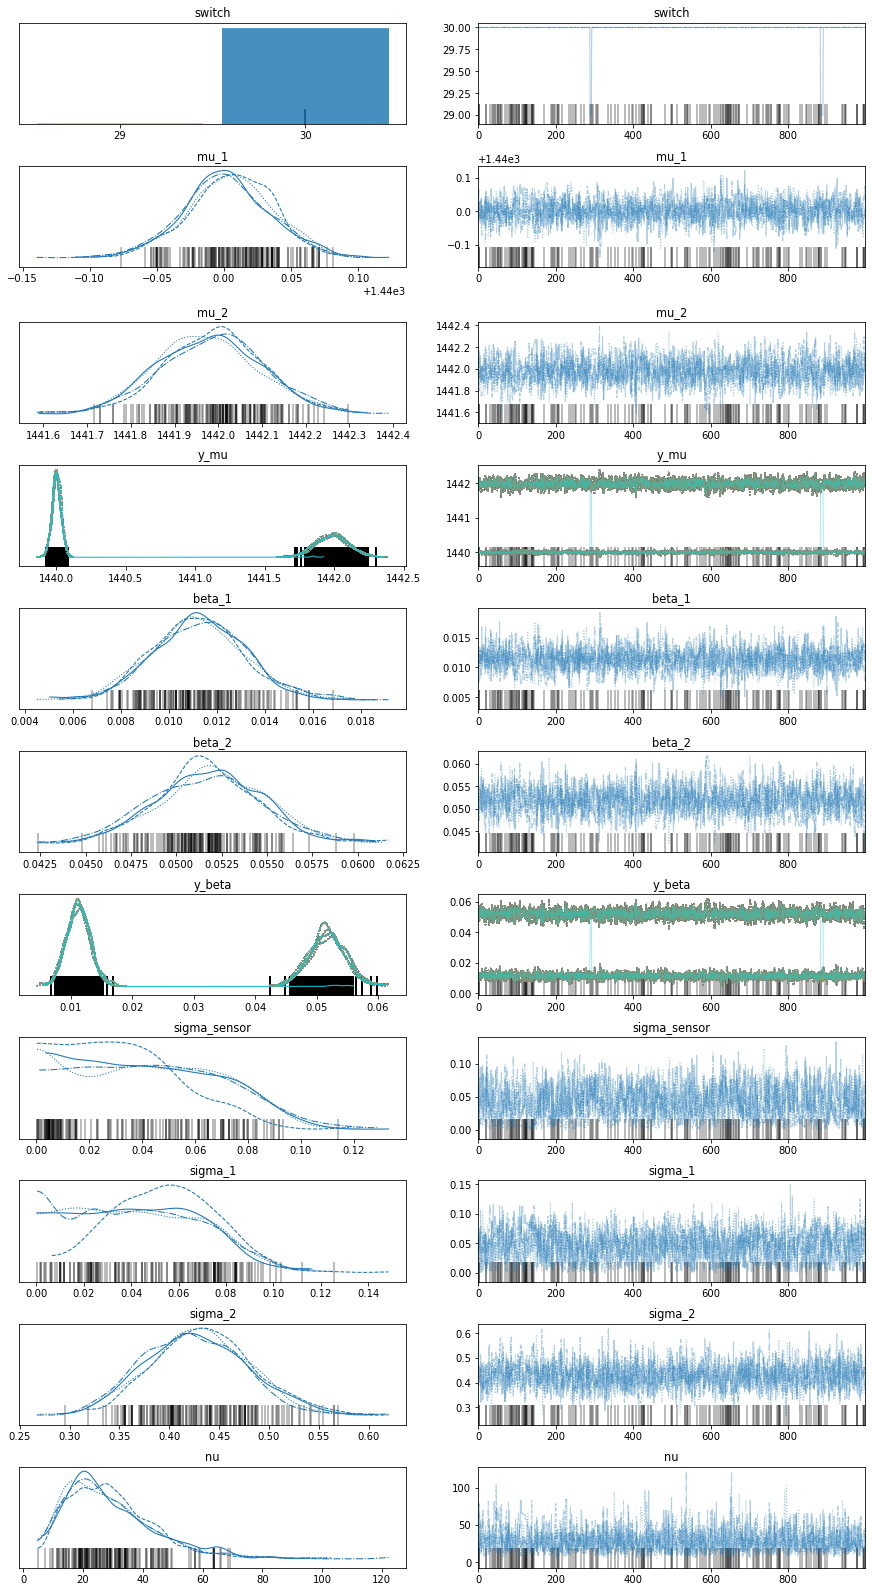

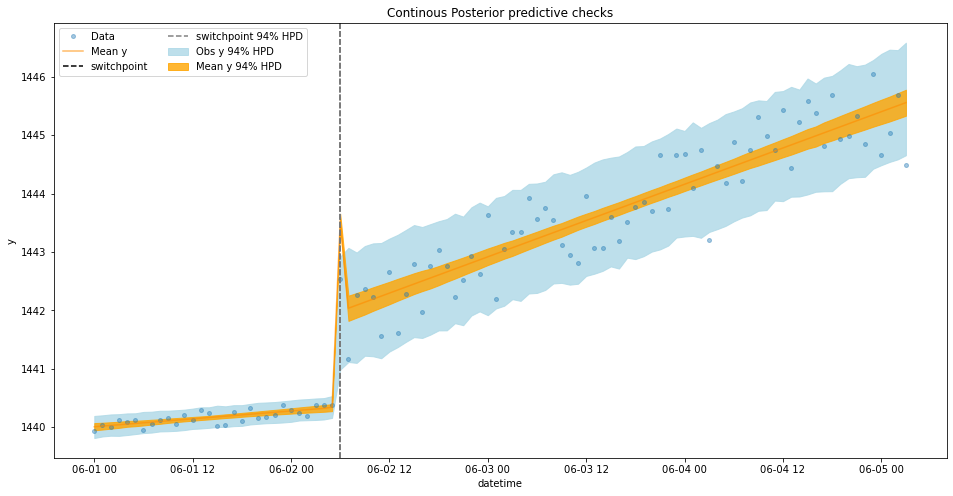

In [63]:
sample_data = SwitchPointDiscreteModel.sample_data(N=100, sp_loc=0.3, mu_1=1440, mu_2=1442, beta_1=0.01, beta_2=0.05, sigma_1=0.1, sigma_2=0.5)
model = SwitchPointDiscreteModel(*sample_data)
model.define_model() 
model.fit()
model.plot_trace()
model.plot_posterior_predictive()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, sigma_2, sigma_1, sigma_sensor, beta_2, beta_1, mu_2, mu_1, switch]


Sampling 4 chains for 10_000 tune and 10_000 draw iterations (40_000 + 40_000 draws total) took 264 seconds.
The acceptance probability does not match the target. It is 0.6842309662821299, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8840329176767731, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


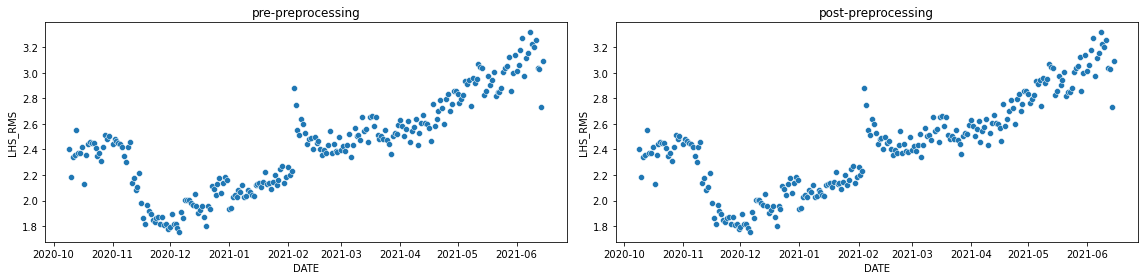

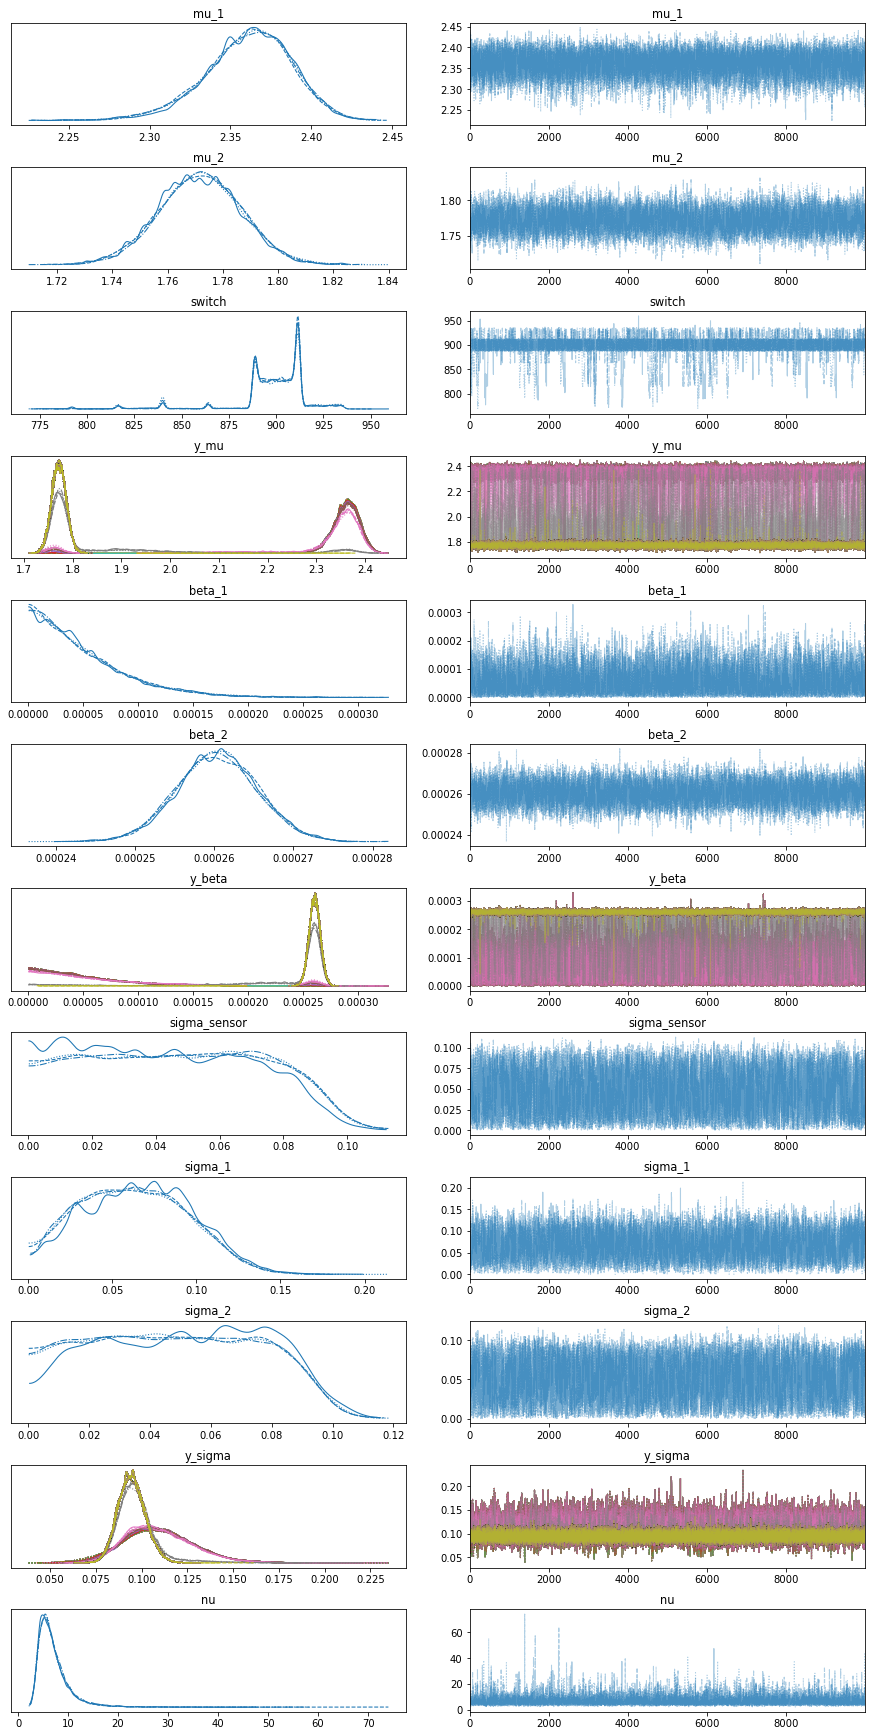

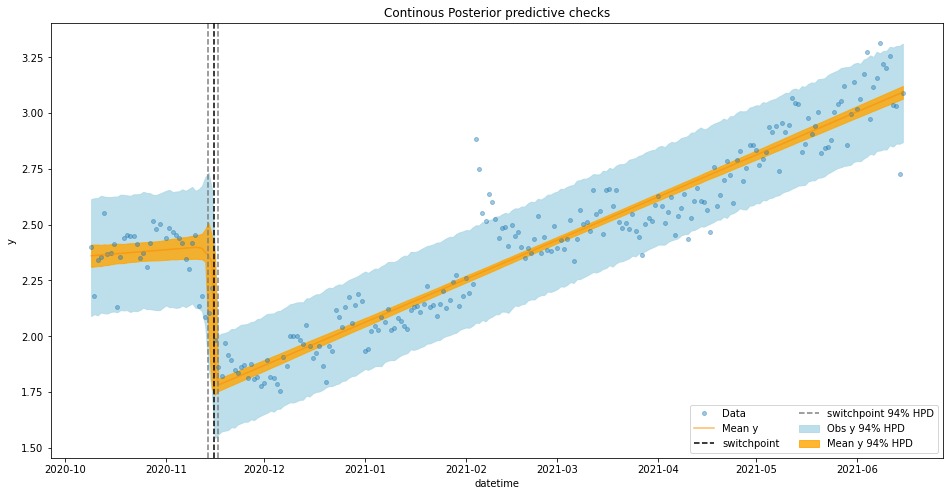

In [67]:
target='LHS_RMS'
index='DATE'
path='IECC_Real_Time_Sensor_PDU_Vibration_Summary (1).csv'
unique_cols = ['Point']
unique_vals = ['CHH72']
model = SwitchPointModel.from_csv(path=path, index=index, target=target, unique_cols=unique_cols, unique_vals=unique_vals, num_samples=10000, num_burnin=10000)
model.define_model() 
model.fit()
model.plot_trace()
model.plot_posterior_predictive()

# Utilities

In [ ]:
#def standardize(arr):
#    return (arr-arr.mean())/arr.std()
#
#def stick_breaking(v):
#    portion_remaining = tt.concatenate([[1], tt.extra_ops.cumprod(1-v)[:-1]])
#    return v * portion_remaining
#
#def norm_cdf(z, mu, std):
#    return 0.5 * (1 + tt.erf((z-mu)/std / np.sqrt(2)))
#
#
#def stick_breaking(v):
#    return v * tt.concatenate(
#        [tt.ones_like(v[:, :1]), tt.extra_ops.cumprod(1 - v, axis=1)[:, :-1]], axis=1
#    )

In [405]:
#with model:
#    summary = pm.summary(trace)
#summary

In [179]:
#with model:
#    pm.plot_forest(trace, r_hat=True);

In [180]:
#with model:
#    pm.plot_posterior(trace);

In [181]:
#with model:
#    pm.plot_energy(trace);

In [182]:
#with model:
#    prior_checks = pm.sample_prior_predictive(samples=100)
    #arr = np.round(prior_checks['s']).astype(int)
    #counts = np.bincount(arr)
    #switchpoint_prior = np.argmax(counts)
    #
    #_, ax = plt.subplots()
    #
    #t_sample = np.linspace(0, t_size, 261)
    #
    #for a,b,t in zip(prior_checks["y_mu"], prior_checks["y_beta"], prior_checks["s"]):
    #    y = a + b * t_sample
    #    ax.plot(t_sample, y, c="k", alpha=0.3)
    #
    #ax.set_xlabel("y")
    #ax.set_ylabel("t")
    #ax.set_title("Prior predictive checks -- Weakly regularizing priors");

In [404]:
#az.plot_ppc(az.from_pymc3(posterior_predictive=ppc, model=model));

In [19]:
np.random.normal(0, 0.3, 60)

array([-0.2465956 ,  0.04631978,  0.05518106, -0.13028625, -0.01765235,
       -0.15301179, -0.07819586, -0.14955019, -0.7789876 ,  0.24910574,
        0.22232546, -0.23365708,  0.04705135, -0.04323953, -0.30950049,
        0.05330983, -0.02325204,  0.09709393, -0.44565334, -0.14051525,
        0.3718465 ,  0.07503771,  0.21890339,  0.37829598,  0.20949417,
       -0.36372499, -0.76519399,  0.41092003,  0.36341103, -0.25045089,
       -0.19450651, -0.19157721, -0.19575311, -0.1786302 ,  0.22871755,
       -0.14780782,  0.16908672, -0.46211447, -0.44548344, -0.15189525,
       -0.12621579, -0.14152631, -0.3099196 ,  0.30185989,  0.35474786,
       -0.16396674,  0.86776811, -0.29623765, -0.12015596,  0.03150692,
       -0.04675394,  0.45583464, -0.34569384, -0.20054783,  0.70010581,
       -0.33848626,  0.34682016,  0.12556493,  0.00120299, -0.35631632])

In [ ]:
# check 
#sample_data = target_data.std()
#with pm.Model():
#    sample_data=pm.HalfNormal("sample", sigma=sample_data).random(size=1000)
#    plt.hist(sample_data,bins=50, range=(0, sample_data*10))
#    plt.show()
#    sample_data2=pm.HalfCauchy("sample2", beta=sample_std).random(size=1000)
#    plt.hist(sample_data2,bins=50, range=(0, sample_data*20))